PCA

In [ ]:
pca = PCA(n_components=0.9, svd_solver='full')
X_pca = pca.fit_transform(X_scaled)

joblib.dump(pca, "project/models/pca_components.pkl")
pd.DataFrame(X_pca).to_csv("project/models/pca_transformed.csv", index=False)

print("PCA reduced shape:", X_pca.shape)

PCA reduced shape: (38, 25)


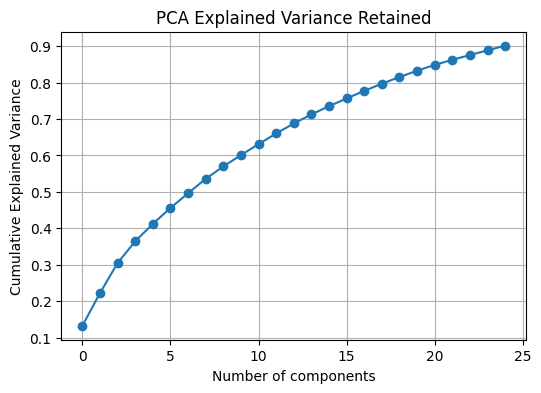

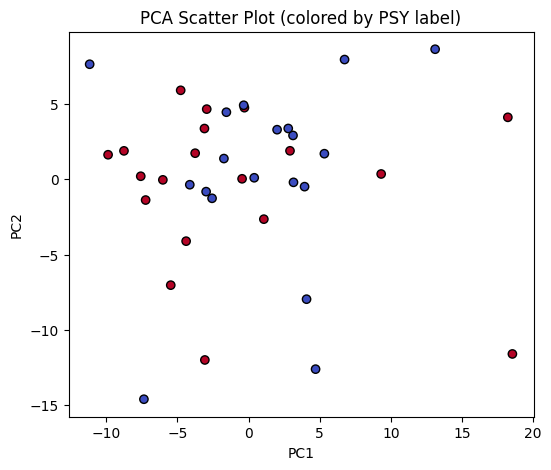

In [ ]:
# 1. Cumulative explained variance
plt.figure(figsize=(6,4))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel("Number of components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Explained Variance Retained")
plt.grid(True)
plt.show()

# 2. 2D PCA scatter
if X_pca.shape[1] >= 2:
    plt.figure(figsize=(6,5))
    if 'y' in locals() and y is not None:
        plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='coolwarm', edgecolors='k')
        plt.title("PCA Scatter Plot (colored by PSY label)")
    else:
        plt.scatter(X_pca[:,0], X_pca[:,1], color="blue", edgecolors='k')
        plt.title("PCA Scatter Plot (unsupervised)")
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.show()
